In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/top_50_stocks_data_formatted.csv")
df.head()

,Ticker,Date,Open,Close,High,Low,Adjusted Close,Volume
0,AAPL,2022-01-03,177.830002,182.009995,182.880005,177.710007,179.481110,104487900
1,AAPL,2022-01-04,182.630005,179.699997,182.940002,179.119995,177.203217,99310400
2,AAPL,2022-01-05,179.610001,174.919998,180.169998,174.639999,172.489609,94537600
3,AAPL,2022-01-06,172.699997,172.000000,175.300003,171.639999,169.610214,96904000
4,AAPL,2022-01-07,172.889999,172.169998,174.139999,171.029999,169.777847,86709100


In [ ]:
# Provide a summary of the dataset (info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31250 entries, 0 to 31249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          31250 non-null  object 
 1   Date            31250 non-null  object 
 2   Open            31250 non-null  float64
 3   Close           31250 non-null  float64
 4   High            31250 non-null  float64
 5   Low             31250 non-null  float64
 6   Adjusted Close  31250 non-null  float64
 7   Volume          31250 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
# Provide a statistical description of the dataset
df.describe()

,Open,Close,High,Low,Adjusted Close,Volume
count,31250.000000,31250.000000,31250.000000,31250.000000,31250.000000,3.125000e+04
mean,184.724154,184.764664,186.725247,182.696215,181.205591,2.568018e+07
std,140.265514,140.314983,141.708531,138.793983,139.353231,7.504722e+07
min,10.971000,11.227000,11.735000,10.813000,11.217704,6.458000e+05
25%,79.117500,79.090498,80.007500,78.242498,75.947414,3.799825e+06
50%,155.369995,155.404999,156.750000,153.790001,150.918922,7.661050e+06
75%,249.955006,250.062504,252.850002,247.270004,244.781708,1.916588e+07
max,911.309998,909.039978,915.539978,905.380005,909.039978,1.543911e+09


In [ ]:
# Check for any missing values
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
Close,0
High,0
Low,0
Adjusted Close,0
Volume,0


here we see that there is no missing values!

Now, lets plot some stock metrics such as:
Annualized Return(AR): The average amount of money earned by an investment each year.

Annualized Volatility(AV): How Risky is this stock to invest in?(I.e. how does the stock fluctuate?).

Sharpe Ratio(SR): Measures the performance of an investment compared to a risk-free asset A higher = better.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31250 entries, 0 to 31249
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ticker          31250 non-null  object        
 1   Date            31250 non-null  datetime64[ns]
 2   Open            31250 non-null  float64       
 3   Close           31250 non-null  float64       
 4   High            31250 non-null  float64       
 5   Low             31250 non-null  float64       
 6   Adjusted Close  31250 non-null  float64       
 7   Volume          31250 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
# Calculate daily returns for all stocks
daily_returns = df.pivot_table(values='Close', index='Date', columns='Ticker').pct_change()

# Calculate annualized returns (252 trading days in a year)
annualized_returns = daily_returns.mean() * 252

# Calculate annualized volatility
annualized_volatility = daily_returns.std() * np.sqrt(252)


risk_free_rate = 0.02

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_returns - risk_free_rate) / annualized_volatility

# Combine metrics into a single DataFrame
metrics_df = pd.DataFrame({
    'AR': annualized_returns,
    'AV': annualized_volatility,
    'SR': sharpe_ratio
})

# Display the first 5 rows of the new metrics DataFrame
metrics_df.head()

,AR,AV,SR
Ticker,,,
AAPL,0.098652,0.282404,0.278509
ABBV,0.117355,0.208614,0.466678
ABT,-0.092584,0.223848,-0.502950
ACN,-0.080659,0.276090,-0.364589
ADBE,0.071310,0.392165,0.130838


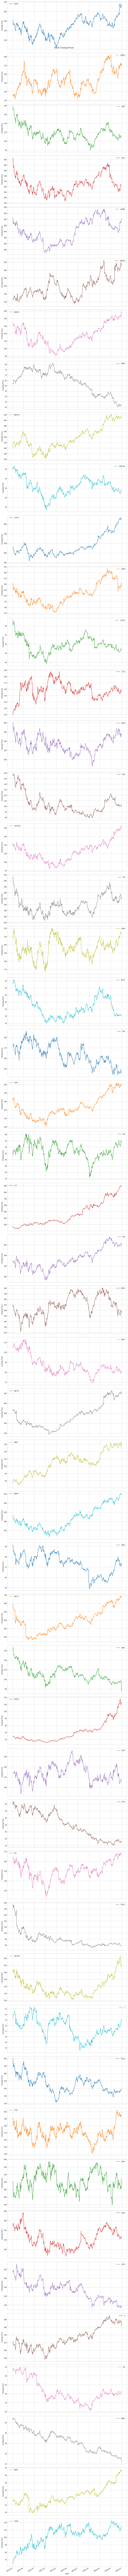

In [ ]:
pt = df.pivot_table(index='Date', columns='Ticker', values='Close') #changes stocks to a pivot table for easier plotting.

axes = pt.plot(
    subplots=True,
    figsize=(10, 4 * len(pt.columns)), #size of plots, gives enough space to see data clearly
    title='Stock Closing Prices'
)

for ax in axes.flatten(): #Labels and grids all plots
    ax.set_ylabel('Closing Price')
    ax.grid(True)

plt.tight_layout() #makes everything fit
plt.show()

In [ ]:
# Set up the plotting area
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# plot Annualized Return
sb.histplot(metrics_df['AR'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Annualized Return')

# plot Annualized Volatility
sb.histplot(metrics_df['AV'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Annualized Volatility')

# plot Sharpe Ratio
sb.histplot(metrics_df['SR'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Sharpe Ratio')

plt.tight_layout()
plt.show()

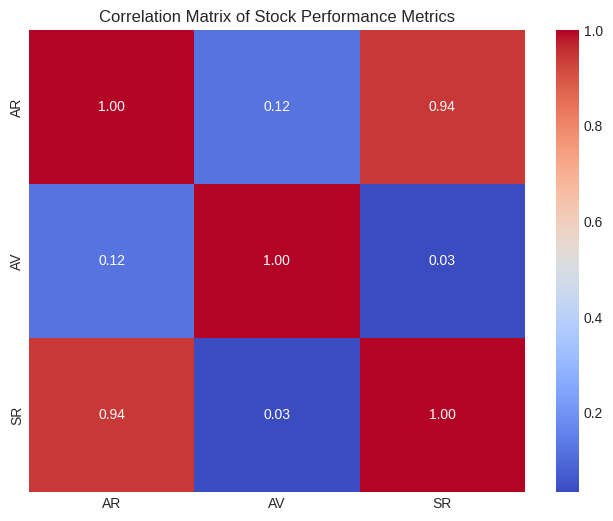

          AR        AV        SR
AR  1.000000  0.121371  0.944744
AV  0.121371  1.000000  0.033093
SR  0.944744  0.033093  1.000000


In [26]:
# Calculate the correlation matrix of the metrics
metrics_correlation = metrics_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(metrics_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Performance Metrics')
plt.show()

print(metrics_correlation)

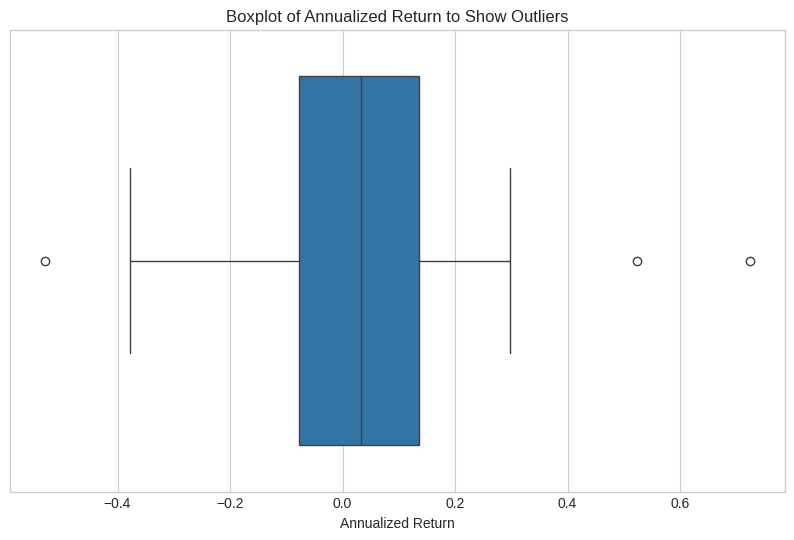

Outlier Detection Report:
Lower Bound for Outliers: -0.3986
Upper Bound for Outliers: 0.4556

Stocks identified as outliers based on Annualized Return:
              AR        AV        SR
Ticker                              
LLY     0.523806  0.275367  1.829583
NVDA    0.723847  0.558868  1.259416
WBA    -0.528481  0.362753 -1.511999


In [27]:
#here lets implement a method to handle the outliers in our data!

Q1 = metrics_df['AR'].quantile(0.25)
Q3 = metrics_df['AR'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = metrics_df[(metrics_df['AR'] < lower_bound) | (metrics_df['AR'] > upper_bound)]

# Visualize with a boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x=metrics_df['AR'])
plt.title('Boxplot of Annualized Return to Show Outliers')
plt.xlabel('Annualized Return')
plt.show()

print("Outlier Detection Report:")
print(f"Lower Bound for Outliers: {lower_bound:.4f}")
print(f"Upper Bound for Outliers: {upper_bound:.4f}")
print("\nStocks identified as outliers based on Annualized Return:")
print(outliers)

I found that the best type of model to implement for predicting stock prices is a type of neural network, so we decided to use one that is easier to implement called the LSTM Network. We chose to use LSTM over a simple model like ARIMA because ARIMA models pretty simple and I had trouble getting our stock predictions to not just be flat lines. Here, however, LSTMS can look at complex patterns and remember information, so I decided to go with that(also I got it to work so thats better than the ARIMA not working at all).

Note: Here are the resources I used to complete this model, I am not young sheldon so I honestly was pretty lost when doing this.
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

https://www.youtube.com/watch?v=mscyUYOF0cw

https://www.youtube.com/watch?v=94PlBzgeq90

I also used the built in Gemini that is inside of Google Colab to help


Now, I am going to use an LSTM model to see if it can predict the Apple stock. I am using a training and test data, so we will give the model 80% of the data as training and then have the model try and predict the last 20% of the data, which we will compare to the actual values(test data)

In [28]:
#import apple data(select only the date and close price columns)
aapl_data = df[df['Ticker'] == 'AAPL'][['Date', 'Close']].set_index('Date')
dataset = aapl_data.values

# scale the data to be between 0 and 1(helps the model perform better)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# create the training data (first 80% of the data)
train_len = int(np.ceil(len(dataset) * .8))
train_data = scaled_data[0:train_len]

# create the training sequences
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# convert to arrays and reshape to be fit into the LSTM model
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
#create the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Display a summary of the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#fit the model into the training set, run 10 epochs
history = model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.0209
Epoch 2/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0060
Epoch 3/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 0.0047
Epoch 4/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 0.0037
Epoch 5/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0037
Epoch 6/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0026
Epoch 7/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 0.0024
Epoch 8/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0025
Epoch 9/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0025
Epoch 10/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0025


In [31]:
#determine the testing data
test_data = scaled_data[train_len - 60:, :]
X_test, y_test = [], dataset[train_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

# Convert to array and shape
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

# Get the model's predicted price values
predictions = model.predict(X_test)
# re-scale the predictions back to original USD prices
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


Root Mean Squared Error: 3.86


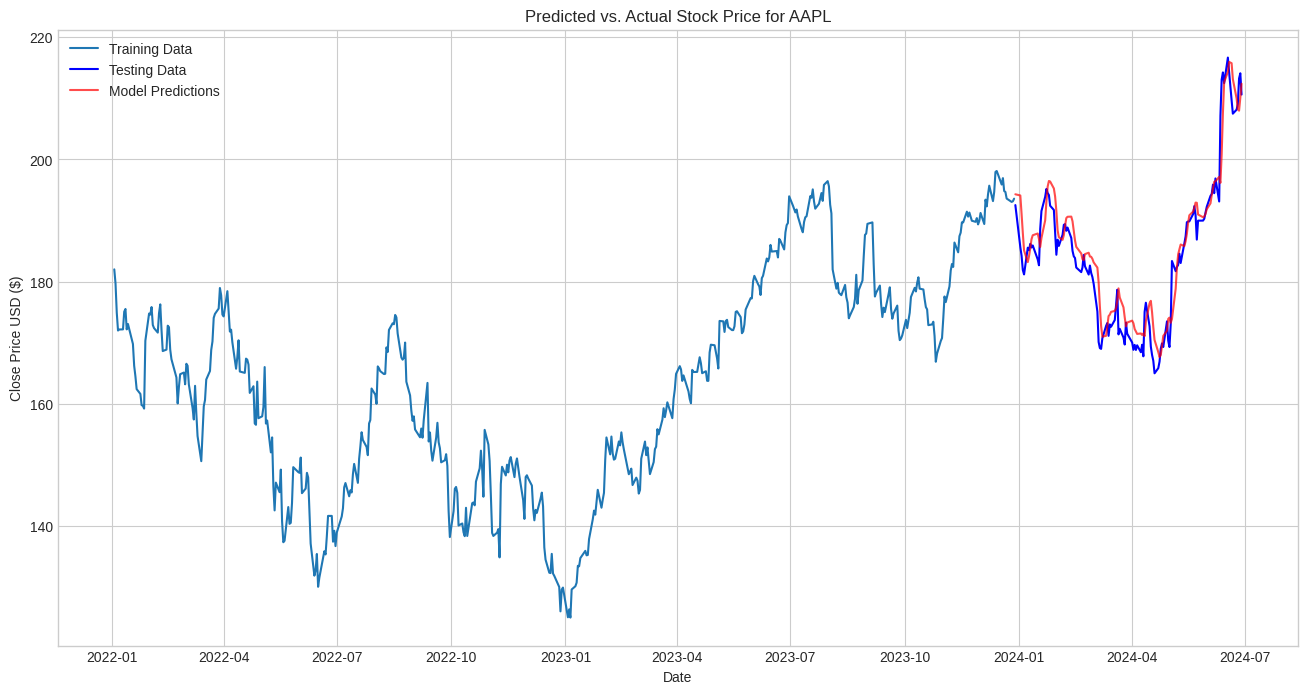

In [32]:
#find the RMSE to determine how accurate our model is
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Create a DataFrame for plotting
train = aapl_data[:train_len]
valid = aapl_data[train_len:].copy() # Using .copy() to avoid the warning about copies
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16,8))
plt.title('Predicted vs. Actual Stock Price for AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Testing Data', color='blue')
plt.plot(valid['Predictions'], label='Model Predictions', color='red', alpha=0.7)
plt.legend()
plt.show()

Here, from the graph, we can see how the model is able to capture the overall trend of the data set and major price changes and movements in the Apple stock. The models predictions are the red line and the actual values are the blue line, so we see that the model is very close to the actual values, telling us the model is pretty accurate. Also, looking at the RMSE, we see that it is a pretty low number of 3.65, telling us that our model did a good job!


In [33]:
#Here, I want to try to get some user input into our program, so I decided to do recomendations for stocks to invest in
def get_recommendations(tickers):
    # Filter the metrics DataFrame for the requested tickers
    recommendations = metrics_df.loc[tickers]
    print("\n--- Performance Metrics for Selected Stocks ---")
    print(recommendations)
    print("\nRecommendation: Based on the Sharpe Ratio, the best performing stock is:")
    print(recommendations.sort_values('SR', ascending=False).head(1))


#get user input
user_input = input("Enter stock tickers separated by commas (e.g., AAPL,MSFT,NVDA): ")
tickers_to_check = [ticker.strip().upper() for ticker in user_input.split(',')]

#check for user input in the data frame
tickers_to_check = [ticker.strip().upper() for ticker in user_input.split(',')]
print(f"User wants to check: {tickers_to_check}")
#get the answers and compare
get_recommendations(tickers_to_check)

Enter stock tickers separated by commas (e.g., AAPL,MSFT,NVDA): AAPL, GOOGL, TSLA
User wants to check: ['AAPL', 'GOOGL', 'TSLA']

--- Performance Metrics for Selected Stocks ---
              AR        AV        SR
Ticker                              
AAPL    0.098652  0.282404  0.278509
GOOGL   0.148805  0.336835  0.382399
TSLA   -0.111166  0.587580 -0.223230

Recommendation: Based on the Sharpe Ratio, the best performing stock is:
              AR        AV        SR
Ticker                              
GOOGL   0.148805  0.336835  0.382399


In [34]:

import ipywidgets as widgets

# Function to generate recommendation
def recommend(sr):
    if sr > 1.0:
        return "INVEST"
    elif sr > 0.5:
        return "CAREFUL, MARKET IS CHANING"
    else:
        return "DO NOT INVEST"

# create an input box to put the tickers you want recomendations for
input_box = widgets.Text(
    value='AAPL, TSLA',
    description='Tickers:'
)
button = widgets.Button(description="Recommend")
output = widgets.Output()

#function to give recomendations for tickers input
def show_result(b):
    with output:
        output.clear_output()
        tickers = [t.strip().upper() for t in input_box.value.split(",")]
        for t in tickers:
            if t in metrics_df.index:
                data = metrics_df.loc[t]
                print(f"{t}")
                print(f"  • Annual Return: {data['AR']:.2%}")
                print(f"  • Volatility: {data['AV']:.2%}")
                print(f"  • Sharpe Ratio: {data['SR']:.2f}")
                print(f"  • Recommendation: {recommend(data['SR'])}\n")
            else:
                print(f"{t} not found in the dataset.\n")

# button to click to give recomendations
button.on_click(show_result)
display(input_box, button, output)


Text(value='AAPL, TSLA', description='Tickers:')

Button(description='Recommend', style=ButtonStyle())

Output()

In [35]:
#get feedback for the recommendations above
def collect_feedback():
    print("\n User Feedback ")
    helpful = input("Was this recommendation helpful? (yes/no): ")
    rating = input("On a scale of 1-5, how would you rate this tool? ")
    comments = input("Any comments? ")
    print(f"Was this helpful? {helpful}")
    print(f"Rating (1-5): {rating}")
    print(f"Comments: {comments}")
    print("\nThank you for the feedback!")

collect_feedback()


 User Feedback 
Was this recommendation helpful? (yes/no): no
On a scale of 1-5, how would you rate this tool? 3
Any comments? thanks for the recommendation, but The stock market is something that you cannot base on statistics!
Was this helpful? no
Rating (1-5): 3
Comments: thanks for the recommendation, but The stock market is something that you cannot base on statistics!

Thank you for the feedback!
